

  Project Level 1 :   Exploratory Data Analysis (EDA) on Retail Sales Data 





Task 1 : Data Loading and Cleaning  Load the retail sales dataset

In [9]:
import pandas as pd
df = pd.read_csv('Desktop/Obasis project1/retail_sales_dataset.csv')
df.dropna(inplace=True)  # Removing missing values

In [16]:
print(df.columns) 


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [26]:
df.head()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100



 Task 2 : Descriptive Statistics  Calculate basic statistics (mean, median, mode, standard deviation) 

In [20]:
print(df.describe())  # Mean, median, standard deviation etc.


       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [28]:
df.tail()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-05-16,996,CUST996,Male,62,Clothing,1,50,50
2023-11-17,997,CUST997,Male,52,Beauty,3,30,90
2023-10-29,998,CUST998,Female,23,Beauty,4,25,100
2023-12-05,999,CUST999,Female,36,Electronics,3,50,150
2023-04-12,1000,CUST1000,Male,47,Electronics,4,30,120


In [32]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000



 Task 3 :  Time Series Analysis  Analyze sales trends over time using time series techniques

In [34]:
df.shape

(1000, 8)

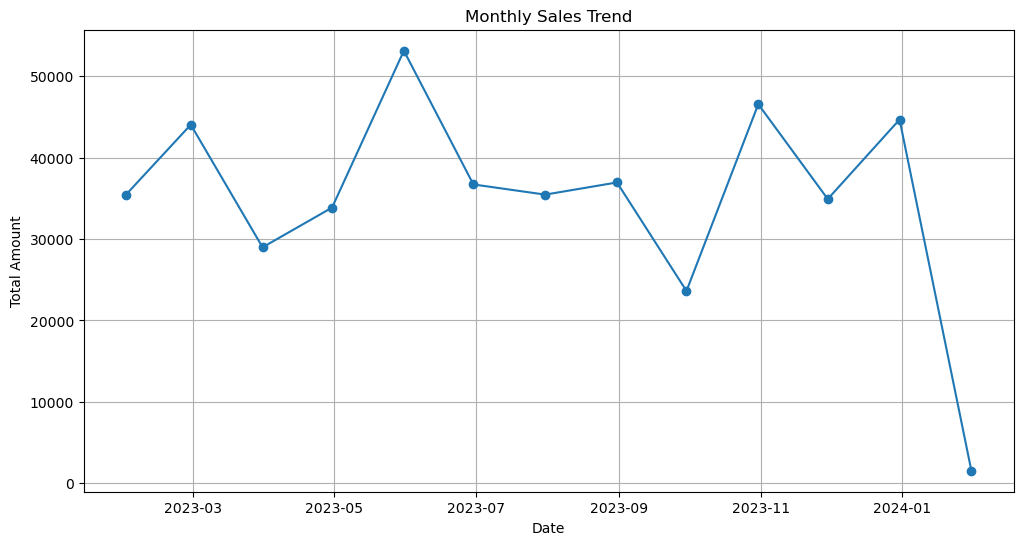

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('Desktop/Obasis project1/retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample to monthly sales
monthly_sales = df['Total Amount'].resample('M').sum()

# Plot the sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


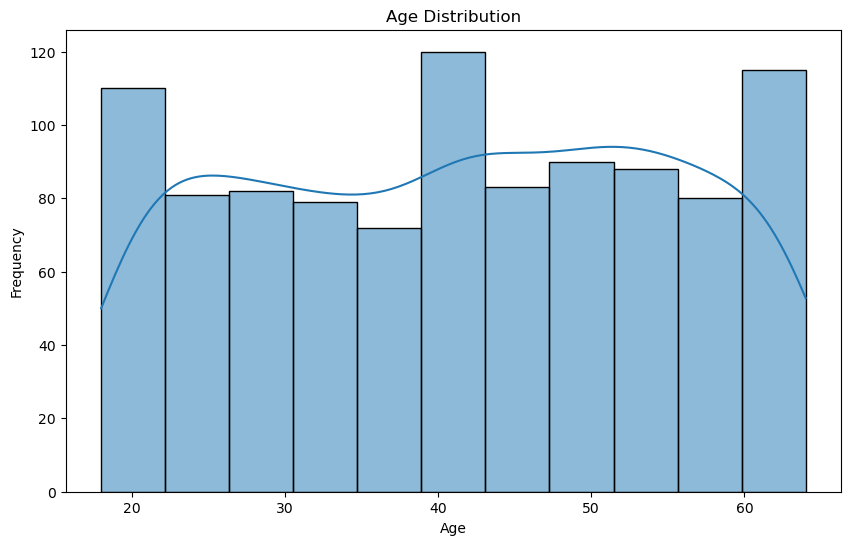

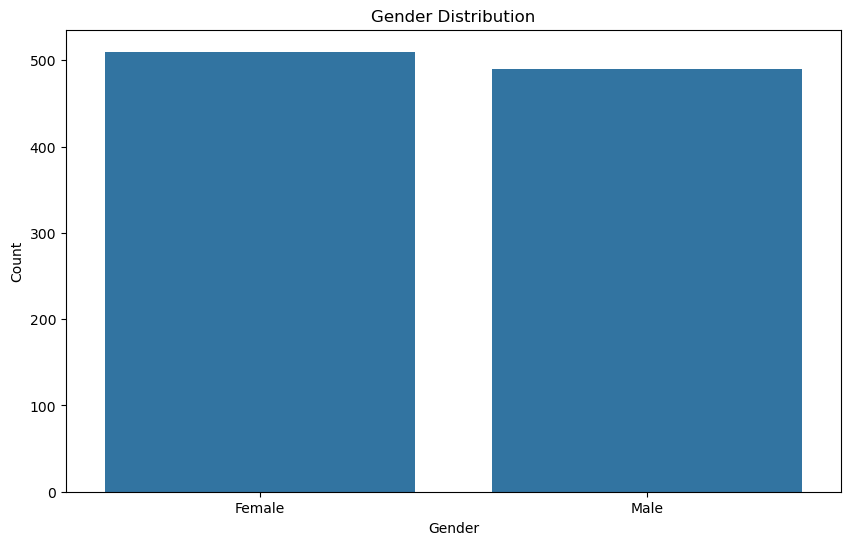

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



 Task 4 : Customer and Product Analysis  Analyze customer demographics and purchasing behavior

In [5]:
#Average purchase amount by gender
avg_purchase_gender = df.groupby('Gender')['Total Amount'].mean()
print(avg_purchase_gender)

# Average purchase amount by age group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['<18', '18-35', '35-50', '50-65', '65+'])
avg_purchase_age_group = df.groupby('Age Group')['Total Amount'].mean()
print(avg_purchase_age_group)


Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64
Age Group
<18      534.047619
18-35    486.728045
35-50    446.198083
50-65    425.910543
65+             NaN
Name: Total Amount, dtype: float64


In [50]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(top_products)


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64



 Task 5 : Visualization  Present insights through bar charts, line plots, and heatmaps

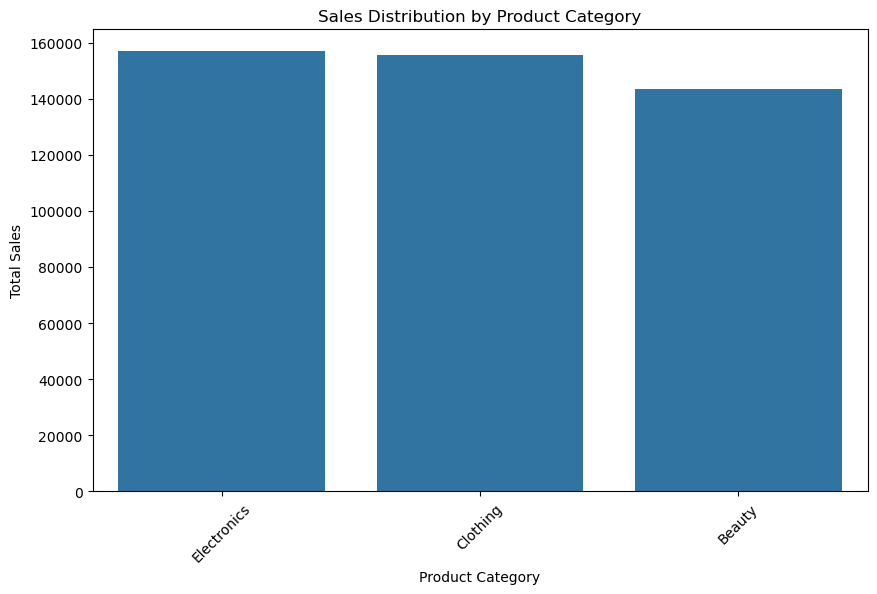

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


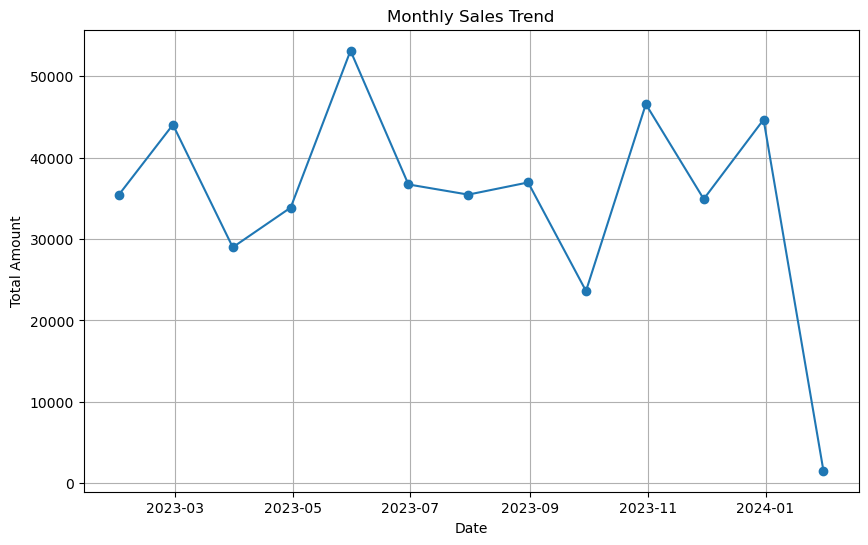

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales = df['Total Amount'].resample('M').sum()
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


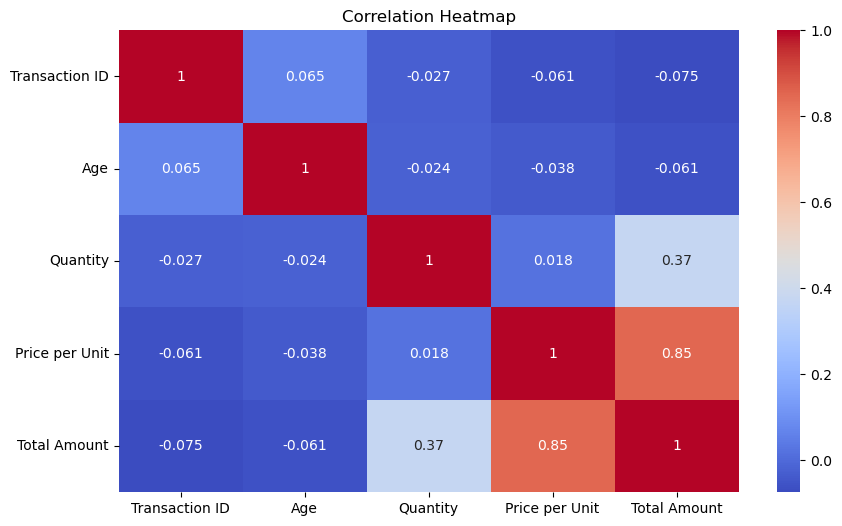

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



 Task 6 : Recommendations  Provide actionable recommendations based on the EDA 

In [73]:
# Identify top-selling products
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:\n", top_products)


Top-Selling Products:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [75]:
# Analyze inventory levels based on sales trends
inventory_optimization = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print("Inventory Optimization Recommendations:\n", inventory_optimization)


Inventory Optimization Recommendations:
 Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


In [77]:
# Segment customers by demographics
age_groups = df['Age Group'].value_counts()
gender_distribution = df['Gender'].value_counts()
print("Customer Segmentation - Age Groups:\n", age_groups)
print("Customer Segmentation - Gender Distribution:\n", gender_distribution)


Customer Segmentation - Age Groups:
 Age Group
18-35    353
35-50    313
50-65    313
<18       21
65+        0
Name: count, dtype: int64
Customer Segmentation - Gender Distribution:
 Gender
Female    510
Male      490
Name: count, dtype: int64


In [79]:
# Recommendations based on customer behavior
customer_behavior = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Quantity': 'mean'
}).sort_values(by='Total Amount', ascending=False)
print("Customer Behavior Insights:\n", customer_behavior.head(10))


Customer Behavior Insights:
              Total Amount  Quantity
Customer ID                        
CUST487              2000       4.0
CUST476              2000       4.0
CUST773              2000       4.0
CUST503              2000       4.0
CUST093              2000       4.0
CUST089              2000       4.0
CUST946              2000       4.0
CUST157              2000       4.0
CUST155              2000       4.0
CUST420              2000       4.0


In [81]:
# Analyze seasonal trends
df['Month'] = df.index.month
seasonal_trends = df.groupby('Month')['Total Amount'].sum()
print("Seasonal Trends:\n", seasonal_trends)


Seasonal Trends:
 Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64


In [83]:
# Price sensitivity analysis
price_sensitivity = df.groupby('Product Category')['Price per Unit'].mean().sort_values(ascending=False)
print("Pricing Strategy Insights:\n", price_sensitivity)


Pricing Strategy Insights:
 Product Category
Beauty         184.055375
Electronics    181.900585
Clothing       174.287749
Name: Price per Unit, dtype: float64
